# Lab 2 - Regression and Hypothesis Testing
- **Author:** Dimitris Papadimitriou ([dimitri@berkeley.edu](mailto:dimitri@berkeley.edu)) (based on Guanghua Chi Lab)
- **Date:** 5 February 2020
- **Course:** INFO 251: Applied machine learning

### Learning Objectives:
By the end of the lab, you will be able to:

* design formulas for linear regression modeling
* work with statsmodels library 
* interpret the coefficient

### Topics:
1. T-tests
2. Univariate regression
3. Multivariate regressions
4. statsmodels
5. Dummy variables
6. Interactions

### References: 
 * [Statsmodels](http://www.statsmodels.org/stable/example_formulas.html#loading-modules-and-functions) 
 * [Applied regression analysis](http://www.stat.washington.edu/elena/classes/syllabus504-2015.htm)

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline  

** Introduce new packages - statsmodels and scipy.stats**

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy as sp

/Applications/anaconda/envs/py3k/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. T-test 

Using simple differences to examine if there is a significant difference in housing price for the neighborhoods where the tract bounds or doesn't bound the Charles River

In [4]:
from sklearn.datasets import load_boston
# Import Boston Housing data
bdata = load_boston()

In [5]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target

In [6]:
sp.stats.ttest_ind(boston[boston.CHAS == 0].MEDV, boston[boston.CHAS == 1].MEDV, axis = 0, equal_var = True)

Ttest_indResult(statistic=-3.9964374660905091, pvalue=7.3906231705199048e-05)

In [7]:
sp.stats.ttest_ind(boston[boston.CHAS == 0].MEDV, boston[boston.CHAS == 1].MEDV, axis = 0, equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.0035671700981375169)

### 2. Regression
#### 2.1 Interpretation of slope

#### [Fire Damage and Distance from the Fire Station](https://artax.karlin.mff.cuni.cz/r-help/library/s20x/html/fire.df.html)
House damage and distance from the fire station of 15 house fires. Data collected by an insurance company for homes in a particular area.

In [8]:
distance = [3.4, 2.6, 1.8, 4.3, 4.6, 2.1, 2.3, 1.1, 3.1, 6.1, 5.5, 4.8, 0.7, 3.8, 3.0]
damage = [26.2, 19.6, 17.8, 31.3, 31.3, 24.0, 23.1, 17.3, 27.5, 43.2, 36.0, 36.4, 14.1, 26.1, 22.3]
fire_df = pd.DataFrame({'distance':distance, 'damage':damage})

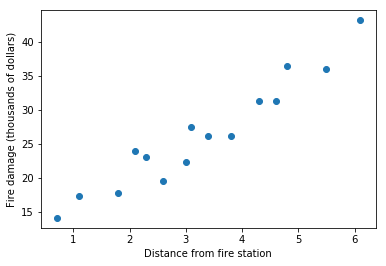

In [9]:
plt.scatter(fire_df.distance, fire_df.damage)
plt.xlabel('Distance from fire station')
plt.ylabel('Fire damage (thousands of dollars)')

In [9]:
model1 = smf.ols(formula='damage ~ distance', data=fire_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 damage   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     156.9
Date:                Tue, 05 Sep 2017   Prob (F-statistic):           1.25e-08
Time:                        22:48:14   Log-Likelihood:                -32.811
No. Observations:                  15   AIC:                             69.62
Df Residuals:                      13   BIC:                             71.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.2779      1.420      7.237      0.0

/Applications/anaconda/envs/py3k/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [11]:
model1 = smf.ols(formula='damage ~ distance + 0', data=fire_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 damage   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     440.1
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           5.62e-12
Time:                        12:43:25   Log-Likelihood:                -44.924
No. Observations:                  15   AIC:                             91.85
Df Residuals:                      14   BIC:                             92.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       7.4972      0.357     20.979      0.0

/Applications/anaconda/envs/py3k/lib/python3.5/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


#### How to interpret?

#### 2.2.  factors and dummy variables

In [1]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

NameError: name 'sm' is not defined

[Guerry](https://cran.r-project.org/web/packages/Guerry/Guerry.pdf)
* Andre-Michel Guerry (1833) was the first to systematically collect and analyze social data on such
things as crime, literacy and suicide with the view to determining social laws and the relations
among these variables.
* The Guerry data frame comprises a collection of ’moral variables’ on the 86 departments of France
around 1830.

In [11]:
df.shape

(86, 23)

In [12]:
df.head(3)

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26


In [14]:
df = df[['Lottery', 'Literacy', 'Region', 'Wealth']].dropna()

In [14]:
df.head()

,Lottery,Literacy,Region,Wealth
0,41,37,E,73
1,38,51,N,22
2,66,13,C,61
3,80,46,E,76
4,79,69,E,83


* Lottery: Per capita wager on Royal Lottery.
* Literacy: Percent Read & Write.
* Region: E, W, N, S, C

A categorical predictor with two or more levels is called a factor. Factors are included in multiple linear regression using dummy variables, which are typically regressors that have only two values, often 0 and 1, indicating which category is present for a particular observation.

In [15]:
res = smf.ols(formula='Lottery ~ Literacy + C(Region)', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.337
Date:                Tue, 05 Sep 2017   Prob (F-statistic):            0.00871
Time:                        22:48:15   Log-Likelihood:                -384.68
No. Observations:                  85   AIC:                             781.4
Df Residuals:                      79   BIC:                             796.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         65.0216      8.104      8.

**How to interpret the coefficients of factor variables?**

* For categorical variables, the interpretation is relative to the given baseline. The baseline is just whatever level comes first (here, “C”).

**What is the lottery if a department at central region with literacy 1?**

**Why is one of the levels missing in the regression?**

In [16]:
res = smf.ols(formula='Lottery ~ Literacy + C(Region) - 1', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.337
Date:                Tue, 05 Sep 2017   Prob (F-statistic):            0.00871
Time:                        22:48:15   Log-Likelihood:                -384.68
No. Observations:                  85   AIC:                             781.4
Df Residuals:                      79   BIC:                             796.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
C(Region)[C]    65.0216      8.104      8.023   

#### 2.3 Interaction terms

In [16]:
res1 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     122.3
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           3.55e-30
Time:                        12:45:45   Log-Likelihood:                -380.15
No. Observations:                  85   AIC:                             766.3
Df Residuals:                      82   BIC:                             773.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Literacy            0.4274      0.099     

In [17]:
res1 = smf.ols(formula='Lottery ~ Literacy * C(Region)', data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1.994
Date:                Tue, 05 Sep 2017   Prob (F-statistic):             0.0516
Time:                        22:48:15   Log-Likelihood:                -383.71
No. Observations:                  85   AIC:                             787.4
Df Residuals:                      75   BIC:                             811.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

**How to interpret Literacy?**

**without individual variable**

In [17]:
res1 = smf.ols(formula='Lottery ~ Literacy * Wealth', data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Wed, 05 Sep 2018   Prob (F-statistic):           1.32e-06
Time:                        12:50:22   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

In [20]:
res1 = smf.ols(formula='Lottery ~ Literacy : Wealth', data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.286
Date:                Wed, 06 Sep 2017   Prob (F-statistic):              0.134
Time:                        10:46:16   Log-Likelihood:                -391.67
No. Observations:                  85   AIC:                             787.3
Df Residuals:                      83   BIC:                             792.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          37.8381      4.348     

#### 2.4 Non-linear transformation of the predictors

In [19]:
res = smf.ols(formula='Lottery ~ np.log(Literacy)', data=df).fit()
res = smf.ols(formula='Lottery ~ np.power(Literacy, 2)', data=df).fit()